In [7]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")

from train_and_inference.test_set_instance_inference import run_inference, load_data_h5, load_model

In [5]:
data, label = load_data_h5("/space/ariyanzarei/sorghum_segmentation/dataset/SPNS/SorghumPartNetFormat/instance_segmentation_validation.hdf5", "points", "labels")
model = load_model("SorghumPartNetInstance", "/space/ariyanzarei/sorghum_segmentation/results/training_logs/SorghumPartNetInstance/SPNS/EXP_02/checkpoints/epoch=8-step=43199.ckpt")
best_params = {
    "eps":1.8, 
    "minpoints":10
}

In [6]:
(
    full_results_dic,
    mean_results_dic,
    best_example_ply,
    worst_example_ply,
    final_predictions,
) = run_inference(model, data[:100], label[:100], best_params)

:: Instance 0/100= Accuracy: 0.9659683704376221 - mCov: 0.7169032146099658 - Average Precision: 0.5740740740740741 - Average Recall: 0.7380952380952381
:: Instance 1/100= Accuracy: 0.9928752779960632 - mCov: 0.9236618218268258 - Average Precision: 0.6333333333333333 - Average Recall: 0.9743589743589745
:: Instance 2/100= Accuracy: 0.9448118805885315 - mCov: 0.5778933427923177 - Average Precision: 0.5208333333333334 - Average Recall: 0.5952380952380952
:: Instance 3/100= Accuracy: 0.957176923751831 - mCov: 0.7308255734914666 - Average Precision: 0.625 - Average Recall: 0.7692307692307693
:: Instance 4/100= Accuracy: 0.9812158942222595 - mCov: 0.7765060418020486 - Average Precision: 0.6851851851851851 - Average Recall: 0.8222222222222223
:: Instance 5/100= Accuracy: 0.971348762512207 - mCov: 0.7516664155906785 - Average Precision: 0.5606060606060606 - Average Recall: 0.8222222222222223
:: Instance 6/100= Accuracy: 0.9588492512702942 - mCov: 0.715526159856498 - Average Precision: 0.755555

<Figure size 1440x1440 with 0 Axes>

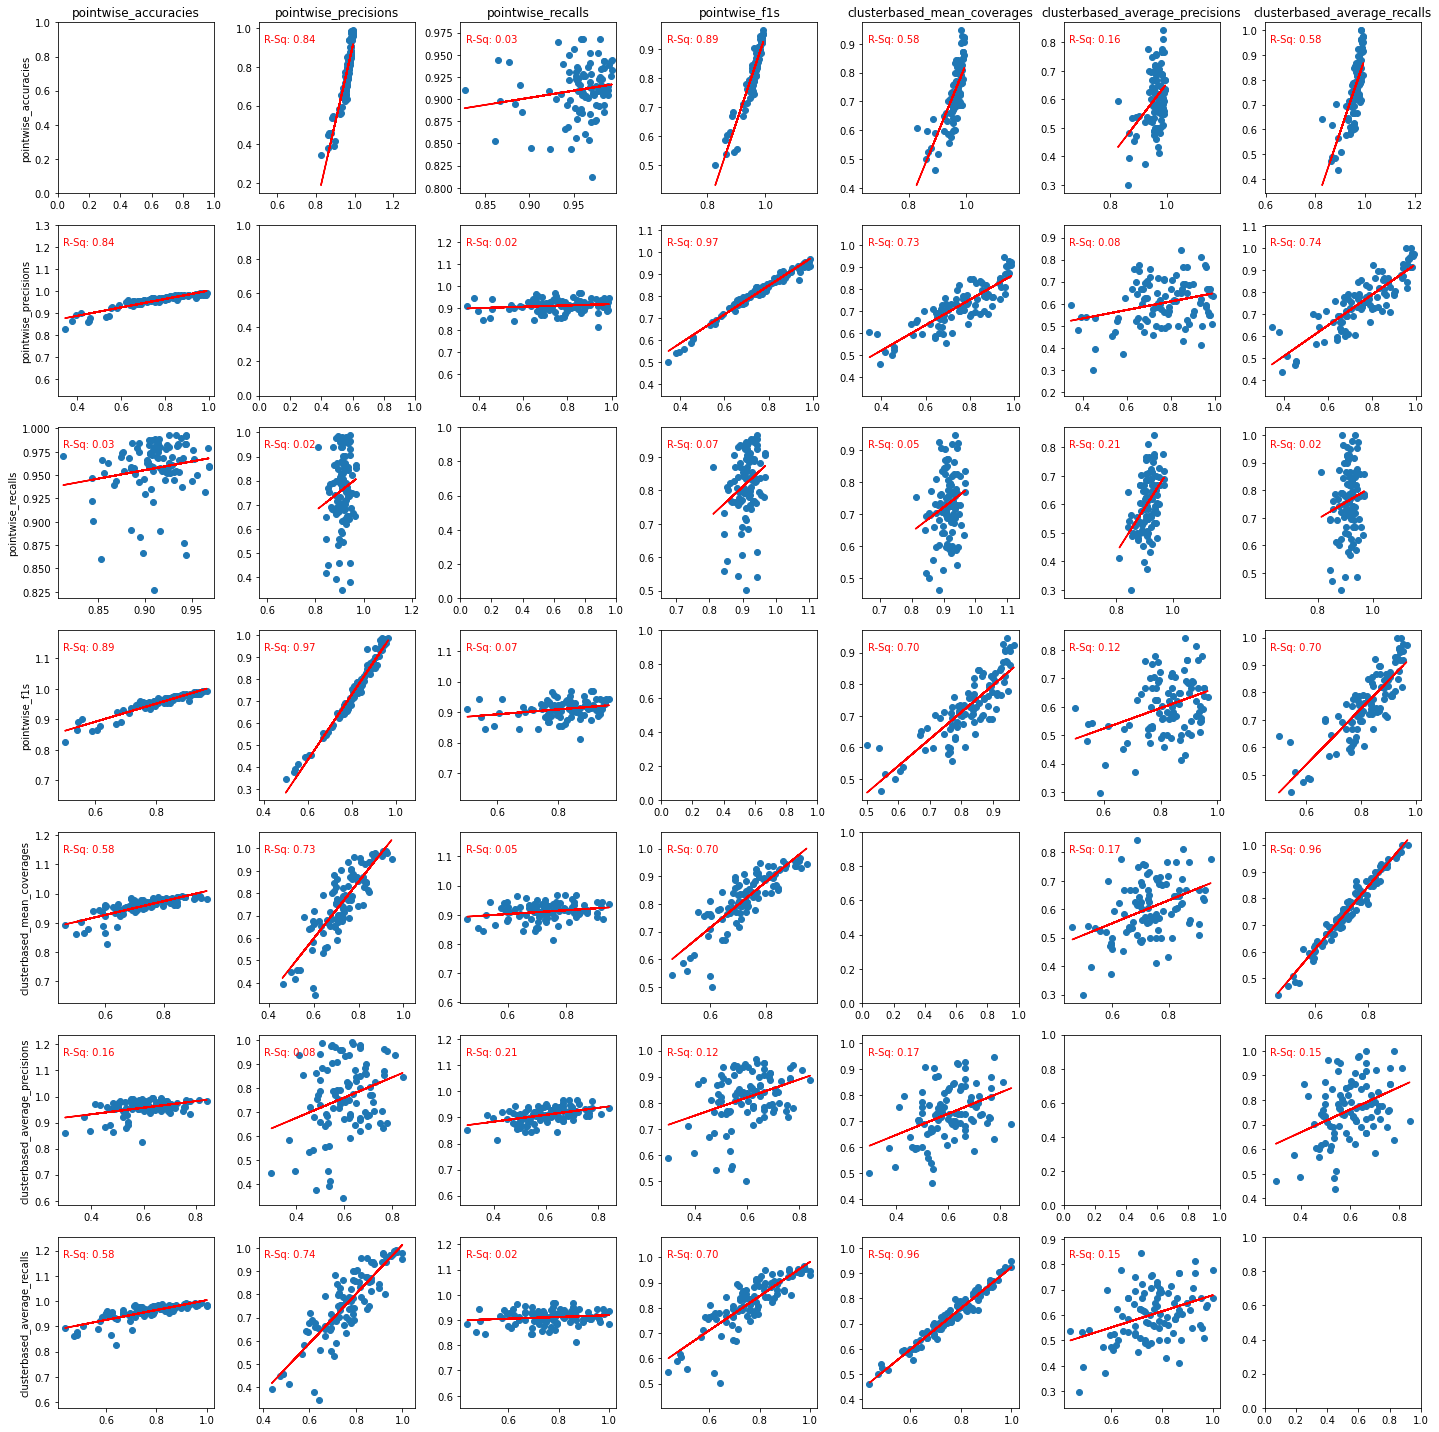

In [32]:
n = len(full_results_dic.keys())

fig = plt.figure(figsize=(20,20))
fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(20,20))

for i, key_x in enumerate(full_results_dic.keys()):
    for j, key_y in enumerate(full_results_dic.keys()):
        ax = axes[i, j]
        if i == 0:
            ax.set_title(key_y)
        if j == 0:
            ax.set_ylabel(key_x)
        if i == j:
            continue
        x_points = np.array(full_results_dic[key_x])
        y_points = np.array(full_results_dic[key_y])
        corr_matrix = np.corrcoef(x_points, y_points)
        corr = corr_matrix[0,1]
        R_sq = corr**2
        a, b = np.polyfit(x_points, y_points, 1)
        ax.scatter(x_points, y_points)
        ax.plot(x_points, a*x_points+b, c='red')  
        ax.axis('equal')
        ax.text(0.2, 0.9, f"R-Sq: {R_sq:3.2f}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, c='red')
fig.tight_layout()
plt.show()